In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('travel insurance.csv')

In [3]:
df.head(10)

,Name of Agency,Type of travel insurance agencies,Distribution Channel,Product Name,Claim Status,Duration of travel,Destination of travel,Amount of sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


In [4]:
miss = df.isnull().sum()

In [5]:
miss

Name of Agency                           0
Type of travel insurance agencies        0
Distribution Channel                     0
Product Name                             0
Claim Status                             0
Duration of travel                       0
Destination of travel                    0
Amount of sales                          0
Commision (in value)                     0
Gender                               45107
Age                                      0
dtype: int64

In [6]:
#first task while choosing best travel agency, it depends on claim status for each agency type

In [7]:
# now we gonna find the claim rates among different types of agencies

In [8]:
claim_status= df.groupby('Type of travel insurance agencies')['Claim Status'].value_counts(normalize=True).unstack()


In [9]:
claim_status

Claim Status,No,Yes
Type of travel insurance agencies,,
Airlines,0.966145,0.033855
Travel Agency,0.992675,0.007325


In [10]:
#so we need to determine the approval rate, which display acceptance rates of each agency
claim_status['Approval Rate'] = claim_status['Yes'] * 100


In [11]:
claim_status

Claim Status,No,Yes,Approval Rate
Type of travel insurance agencies,,,
Airlines,0.966145,0.033855,3.385461
Travel Agency,0.992675,0.007325,0.732521


In [12]:
# the task one is finished here, it is a result
claim_status[['Approval Rate']]


Claim Status,Approval Rate
Type of travel insurance agencies,
Airlines,3.385461
Travel Agency,0.732521


In [13]:
# task 2

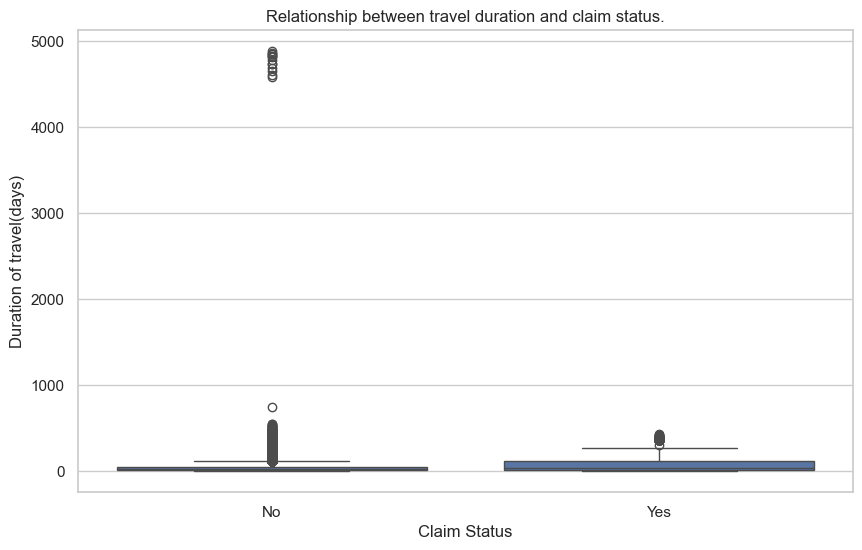

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')
plt.figure(figsize = (10,6))
sns.boxplot(x='Claim Status', y='Duration of travel', data=df)

plt.title('Relationship between travel duration and claim status.')
plt.xlabel("Claim Status")
plt.ylabel('Duration of travel(days)')

plt.show()

In [15]:
# task 3

In [16]:
choice_distribution =  df.groupby('Distribution Channel')['Claim Status'].value_counts(normalize=True).unstack()

choice_distribution

Claim Status,No,Yes
Distribution Channel,,
Offline,0.984643,0.015357
Online,0.985374,0.014626


In [17]:
choice_distribution['Approval Rate'] = choice_distribution['Yes']*100
choice_distribution

Claim Status,No,Yes,Approval Rate
Distribution Channel,,,
Offline,0.984643,0.015357,1.535682
Online,0.985374,0.014626,1.462576


In [18]:
choice_distribution[['Approval Rate']]

Claim Status,Approval Rate
Distribution Channel,
Offline,1.535682
Online,1.462576


In [19]:
# task 4

In [20]:
miss

Name of Agency                           0
Type of travel insurance agencies        0
Distribution Channel                     0
Product Name                             0
Claim Status                             0
Duration of travel                       0
Destination of travel                    0
Amount of sales                          0
Commision (in value)                     0
Gender                               45107
Age                                      0
dtype: int64

In [21]:
# so there are nearly 45k NaN, i decide to delete them before continuing

In [22]:
df_n = df.dropna(subset = ['Gender'])

In [23]:
df_n.head()

,Name of Agency,Type of travel insurance agencies,Distribution Channel,Product Name,Claim Status,Duration of travel,Destination of travel,Amount of sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
11,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.0,6.30,M,47
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.0,49.40,F,48


In [24]:
df.shape

(63326, 11)

In [25]:
df_n.shape

(18219, 11)

In [26]:
gender_sales = df_n.groupby('Gender')['Amount of sales'].sum()


In [27]:
gender_sales

Gender
F    525327.50
M    522062.59
Name: Amount of sales, dtype: float64

In [28]:
# task 5

In [29]:
successful_claims = df[df['Claim Status'] == 'Yes']
successful_claims

,Name of Agency,Type of travel insurance agencies,Distribution Channel,Product Name,Claim Status,Duration of travel,Destination of travel,Amount of sales,Commision (in value),Gender,Age
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
248,C2B,Airlines,Online,Silver Plan,Yes,10,SINGAPORE,43.55,10.89,M,45
313,EPX,Travel Agency,Online,Cancellation Plan,Yes,73,THAILAND,16.00,0.00,NaN,36
419,C2B,Airlines,Online,Silver Plan,Yes,11,SINGAPORE,62.25,15.56,M,33
424,C2B,Airlines,Online,Annual Silver Plan,Yes,365,SINGAPORE,187.85,46.96,M,32
...,...,...,...,...,...,...,...,...,...,...,...
63173,EPX,Travel Agency,Online,Cancellation Plan,Yes,32,VIET NAM,12.00,0.00,NaN,35
63199,C2B,Airlines,Online,Bronze Plan,Yes,7,SINGAPORE,20.00,5.00,M,30
63206,C2B,Airlines,Online,Bronze Plan,Yes,27,SINGAPORE,60.00,15.00,F,30
63208,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,21.00,5.25,M,28


In [30]:

print('1 for YES  0 for NO')

1 for YES  0 for NO


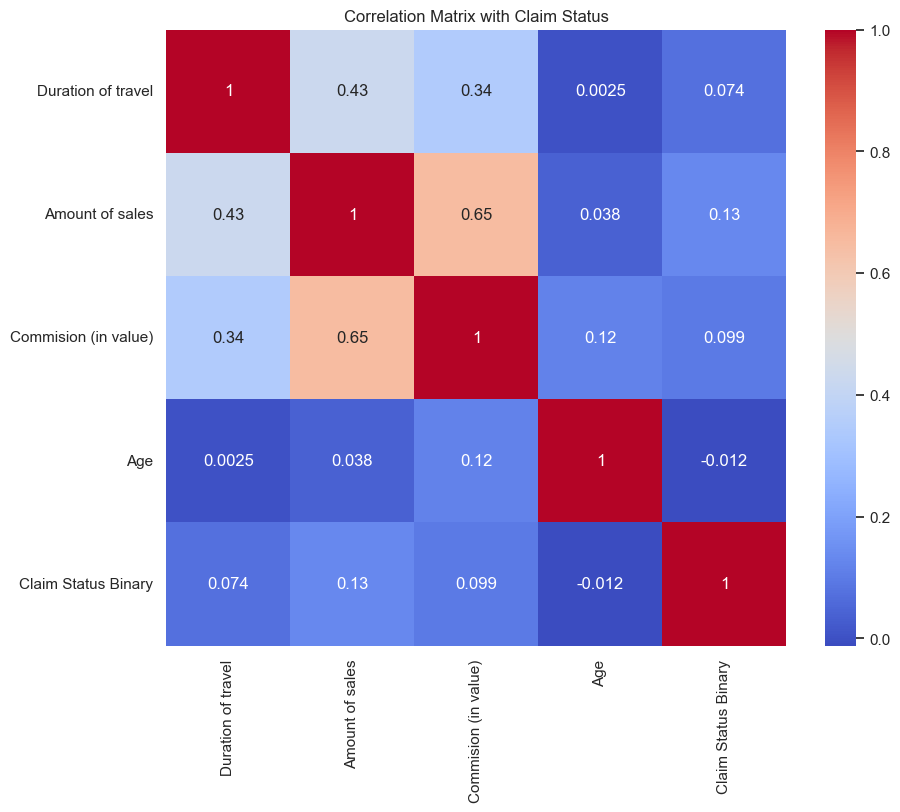

In [31]:
# I create a relationship between claim status and numerics
df['Claim Status Binary'] = df['Claim Status'].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_features = ['Duration of travel', 'Amount of sales', 'Commision (in value)', 'Age', 'Claim Status Binary']

df_numerical = df[numerical_features]


plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Claim Status')

plt.show()

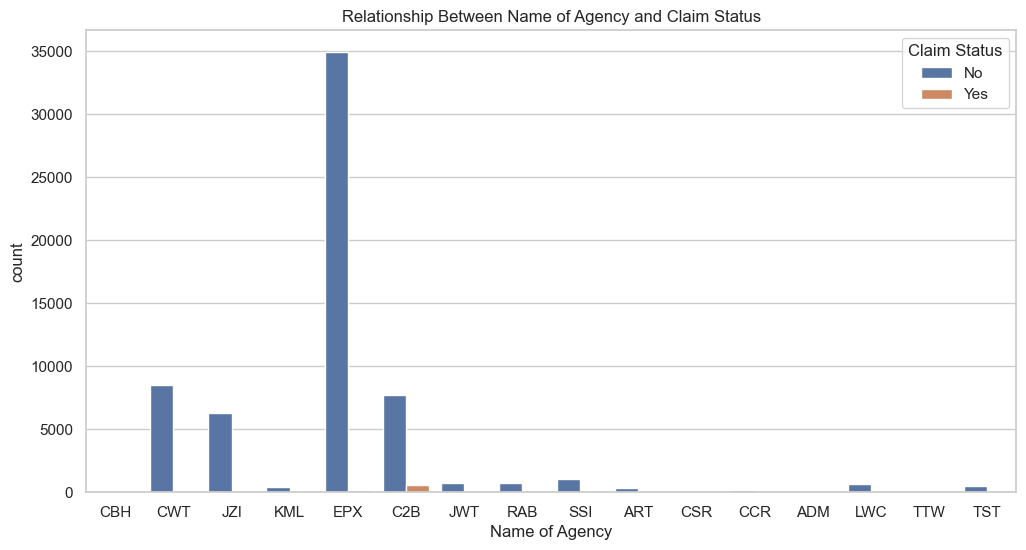

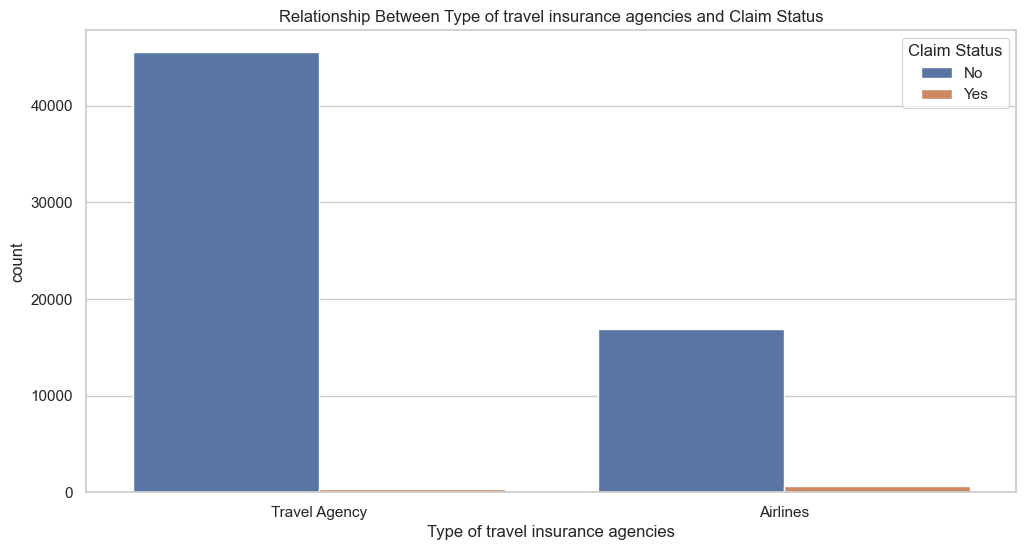

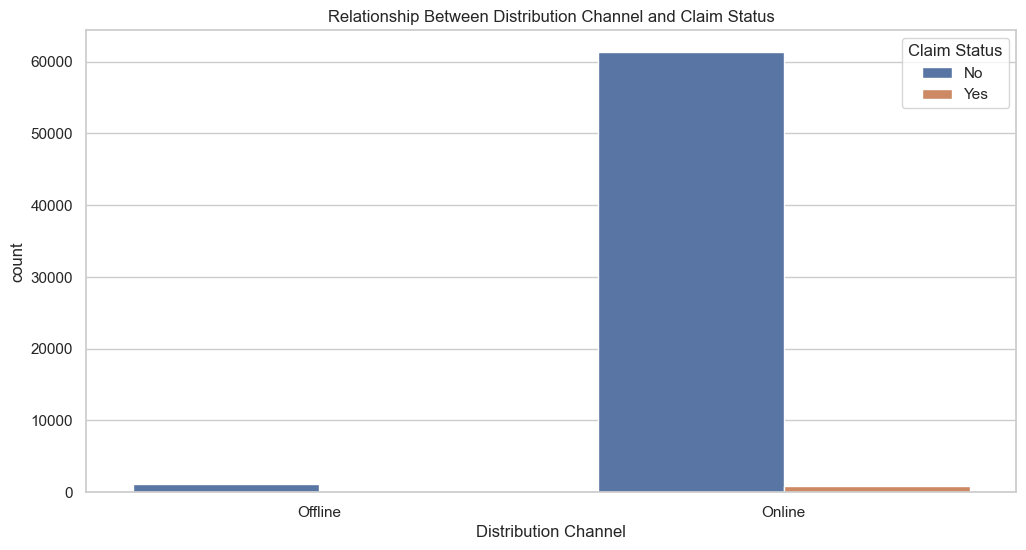

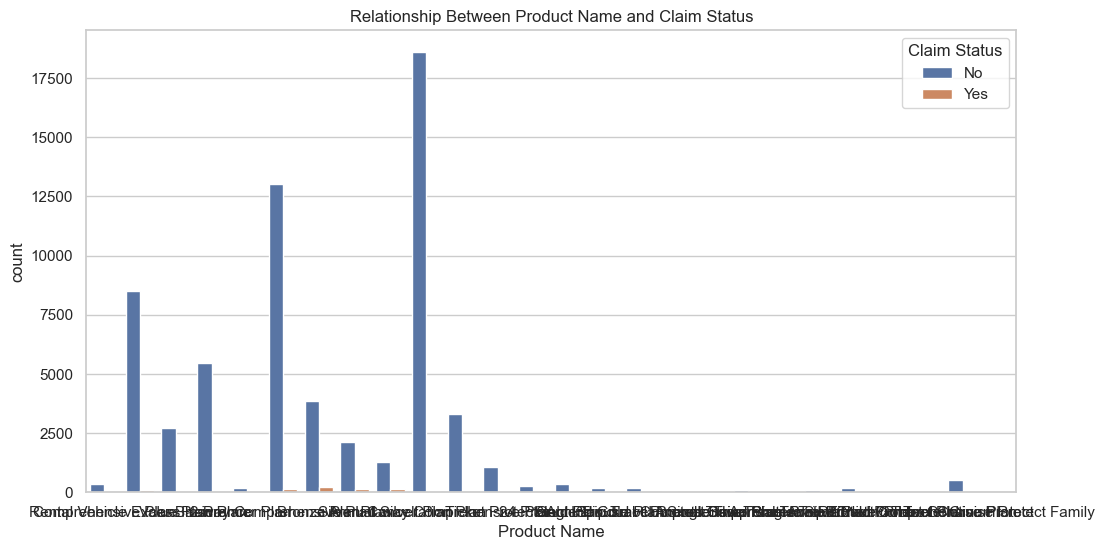

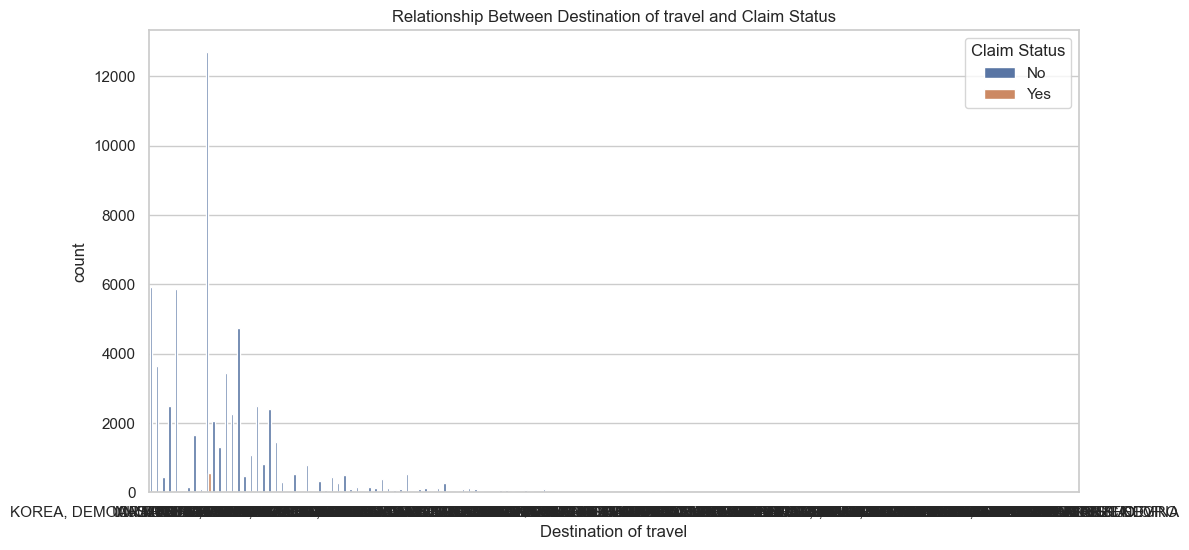

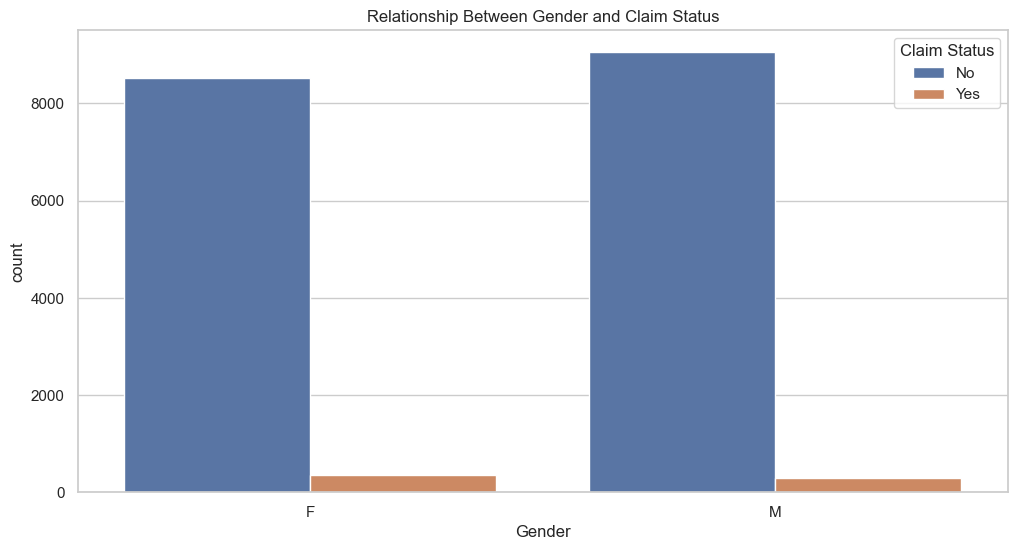

In [32]:
# that one is for cateogry columns
df['Claim Status Binary'] = df['Claim Status'].apply(lambda x: 1 if x == 'Yes' else 0)


categorical_features = ['Name of Agency', 'Type of travel insurance agencies', 'Distribution Channel', 'Product Name', 'Destination of travel', 'Gender']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='Claim Status', data=df)
    plt.title(f'Relationship Between {feature} and Claim Status')
    plt.show()

In [33]:
# task 6

In [34]:
# after a lot of process my df is gonna become mess, so i need to create again like refresh all the confusion
df = pd.read_csv('travel insurance.csv')

In [35]:
df['Age'].describe()

count    63326.000000
mean        39.969981
std         14.017010
min          0.000000
25%         35.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

In [36]:
print(df['Age'].apply(lambda x: isinstance(x, (int, float))).all())


True


In [37]:
# so if u ask why the output showed True, Because there is no any value different from INteger

In [38]:
missing_ages = df['Age'].isnull().sum()
print(f"missing values in Age col: {missing_ages}")


missing values in Age col: 0


In [39]:
# also it hasnt miss values

In [40]:
# there is left looking for only Outliers

In [41]:
Q1 = df['Age'].quantile(0.25)
Q3 =df['Age'].quantile(0.75)
iqr = Q3 -  Q1

low= Q1 - 1.5 * iqr
up =Q3 + 1.5 * iqr

outliers = df[(df['Age'] < low) | (df['Age'] > up)]

print("Outliers in the Age col:")
print(outliers[['Age']])

Outliers in the Age col:
       Age
0       81
1       71
10     118
13      64
17      58
...    ...
63282   79
63287   21
63302   62
63323   57
63324   63

[7422 rows x 1 columns]


In [42]:
# those are outside the outliers

In [43]:
# as a result the misunderstanding is about outliers, beacuse 118 years old doesnt make sense
